In [1]:
!pip install keras
!pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
np.random.seed(42)

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

In [4]:
file_path = r'/content/drive/MyDrive/ML_PROJECTS/archive/HAM10000_metadata[1].csv'
skin_df = pd.read_csv(file_path)

In [5]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [6]:
import os
from glob import glob

image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join('/content/drive/MyDrive/ML_PROJECTS/archive', '*', '*.jpg'))}


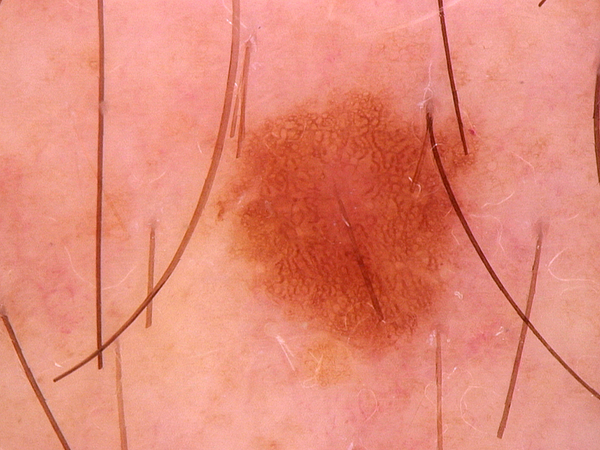

In [7]:
from IPython.display import display
target_image_id = 'ISIC_0029303'
image_file_path = image_path.get(target_image_id)
if image_file_path:
    img = Image.open(image_file_path)
    display(img)
else:
    print(f"Image with ID '{target_image_id}' not found.")

In [8]:
target_image_id

'ISIC_0029303'

In [9]:
image_ids_by_category = skin_df.groupby('dx')['image_id'].unique()

In [10]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [11]:
path = r'/content/drive/MyDrive/ML_PROJECTS/archive/hmnist_28_28_RGB[1].csv'
df = pd.read_csv(path)

In [12]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [13]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [14]:
print(len(train_set))

8012


In [15]:
print(len(test_set))

2003


In [16]:
df.label.unique()

array([6, 4, 2, 1, 0, 3, 5])

In [17]:
classes = {0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
           1:('bcc', 'basal cell carcinoma'),
           2:('bkl', 'benign keratosis-like lesions'),
           3:('df', 'dermatofibroma'),
           4:('nv', 'melanocytic nevi'),
           5:('vasc', 'pyogenic granulomas and hemorrhage'),
           6:('mel', 'melanoma'),}

In [18]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [19]:
import torch

In [20]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


<Axes: ylabel='count'>

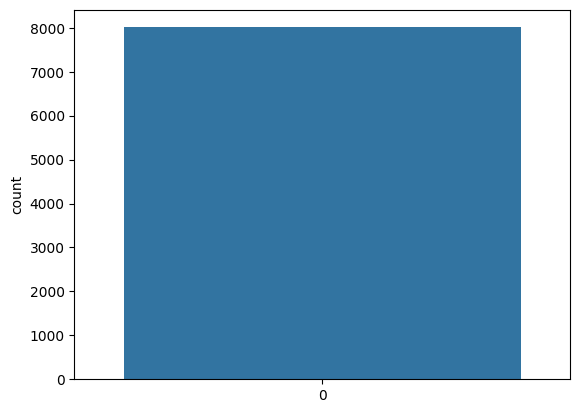

In [21]:
sns.countplot(train_set['label'])

In [22]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_train, y_train = oversample.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

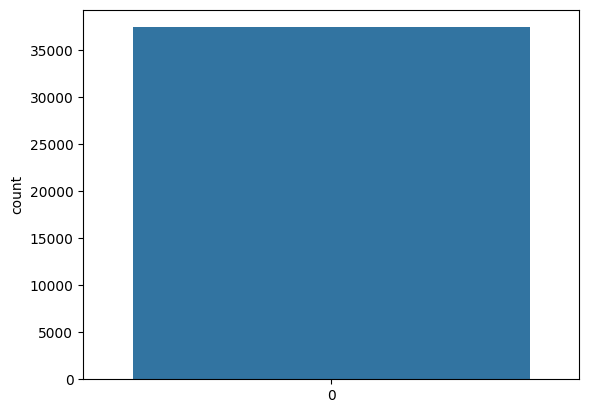

In [23]:
sns.countplot(y_train)

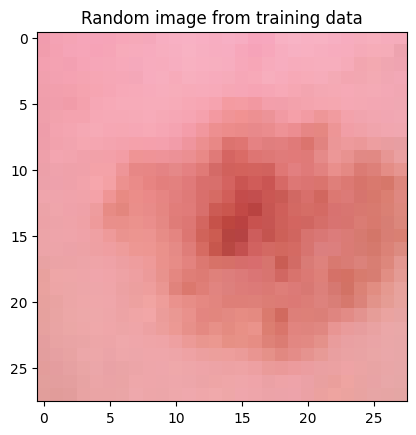

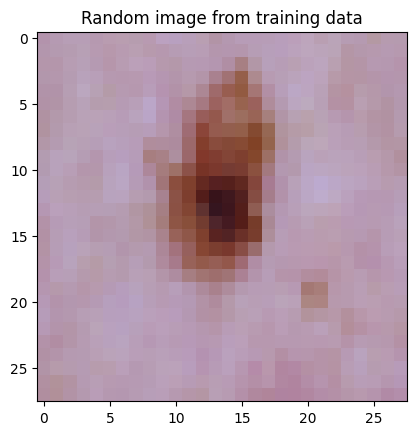

In [24]:
import random
num = random.randint(0,8000)
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
plt.imshow(x_train[num].reshape(28, 28, 3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

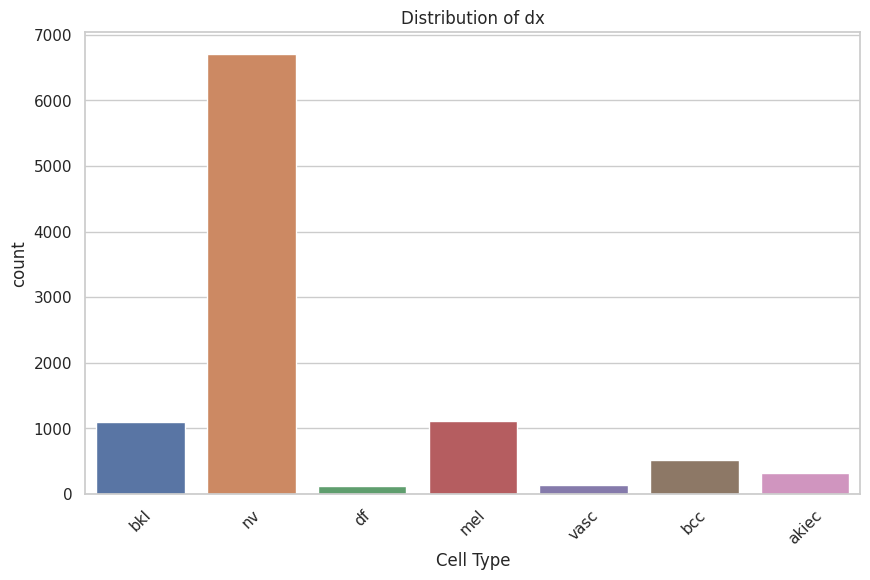

In [25]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
sns.countplot(data = skin_df, x = 'dx')
plt.title('Distribution of dx')
plt.xlabel('Cell Type')
plt.ylabel('count')
plt.xticks(rotation= 45)
plt.show()

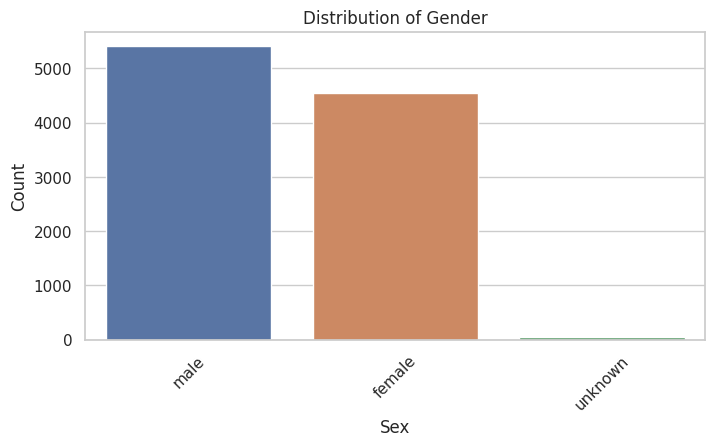

In [26]:
plt.figure(figsize = (8,4))
sns.set(style = 'whitegrid')
sns.countplot(data = skin_df, x = 'sex')
plt.title('Distribution of Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

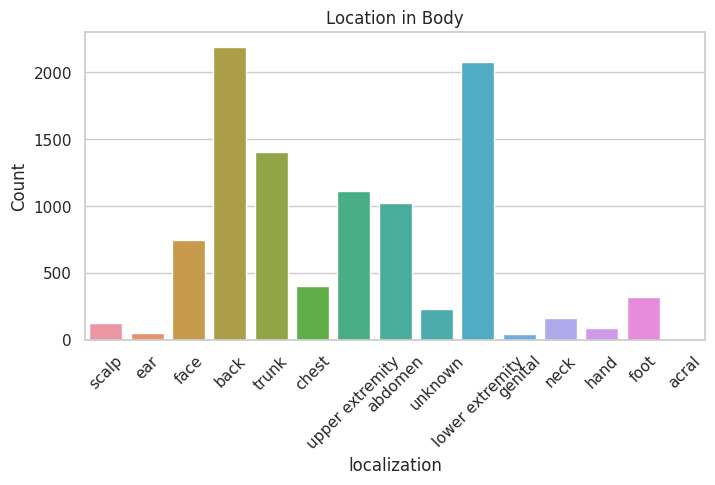

In [27]:
plt.figure(figsize = (8,4))
sns.set(style = 'whitegrid')
sns.countplot(data = skin_df, x = 'localization')
plt.title('Location in Body')
plt.xlabel('localization')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

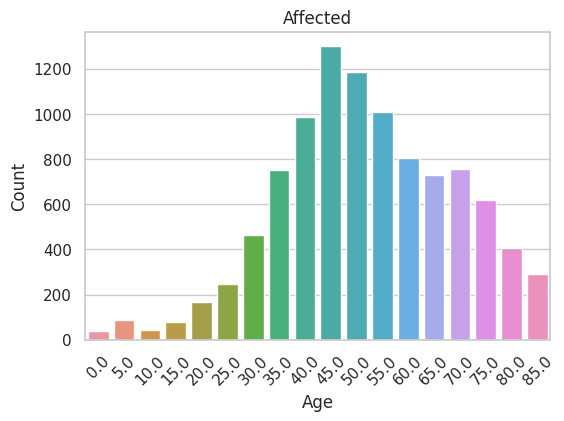

In [28]:
plt.figure(figsize = (6,4))
sns.set(style = 'whitegrid')
sns.countplot(data = skin_df, x = 'age')
plt.title('Affected')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [30]:
%time

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

In [31]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor = 'val_acc', mode = 'max', verbose=1, save_best_only=True)

In [32]:
%time
optimizer = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


In [33]:
from datetime import datetime
start_time = datetime.now()

history = model.fit(x_train, y_train, validation_split=0.2, batch_size = 128, epochs = 100, shuffle = TabError, callbacks = [callback])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/100
235/235 [==============================] - ETA: 0s - loss: 1.1781 - accuracy: 0.5772

235/235 [==============================] - 26s 18ms/step - loss: 1.1781 - accuracy: 0.5772 - val_loss: 1.8409 - val_accuracy: 0.2772
Epoch 2/100
235/235 [==============================] - ETA: 0s - loss: 0.4140 - accuracy: 0.8618

235/235 [==============================] - 4s 17ms/step - loss: 0.4140 - accuracy: 0.8618 - val_loss: 1.6951 - val_accuracy: 0.4029
Epoch 3/100
232/235 [============================>.] - ETA: 0s - loss: 0.3390 - accuracy: 0.8881

235/235 [==============================] - 4s 18ms/step - loss: 0.3384 - accuracy: 0.8883 - val_loss: 1.5950 - val_accuracy: 0.4023
Epoch 4/100
233/235 [============================>.] - ETA: 0s - loss: 0.2268 - accuracy: 0.9238

235/235 [==============================] - 3s 13ms/step - loss: 0.2266 - accuracy: 0.9239 - val_loss: 1.5368 - val_accuracy: 0.4355
Epoch 5/100
233/235 [============================>.] - ETA: 0s - loss: 0.1979 - accuracy: 0.9340

235/235 [==============================] - 3s 13ms/step - loss: 0.1977 - accuracy: 0.9339 - val_loss: 0.9081 - val_accuracy: 0.5993
Epoch 6/100
233/235 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9538

235/235 [==============================] - 3s 12ms/step - loss: 0.1376 - accuracy: 0.9536 - val_loss: 0.9268 - val_accuracy: 0.6382
Epoch 7/100
235/235 [==============================] - ETA: 0s - loss: 0.1902 - accuracy: 0.9400

235/235 [==============================] - 4s 16ms/step - loss: 0.1902 - accuracy: 0.9400 - val_loss: 0.9885 - val_accuracy: 0.6120
Epoch 8/100
235/235 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9637

235/235 [==============================] - 4s 17ms/step - loss: 0.1090 - accuracy: 0.9637 - val_loss: 1.0952 - val_accuracy: 0.5150
Epoch 9/100
233/235 [============================>.] - ETA: 0s - loss: 0.0927 - accuracy: 0.9691

235/235 [==============================] - 3s 13ms/step - loss: 0.0926 - accuracy: 0.9691 - val_loss: 0.6353 - val_accuracy: 0.7336
Epoch 10/100
234/235 [============================>.] - ETA: 0s - loss: 0.1320 - accuracy: 0.9562

235/235 [==============================] - 3s 12ms/step - loss: 0.1323 - accuracy: 0.9561 - val_loss: 0.6556 - val_accuracy: 0.7519
Epoch 11/100
234/235 [============================>.] - ETA: 0s - loss: 0.0888 - accuracy: 0.9705

235/235 [==============================] - 3s 13ms/step - loss: 0.0889 - accuracy: 0.9705 - val_loss: 0.3857 - val_accuracy: 0.8222
Epoch 12/100
234/235 [============================>.] - ETA: 0s - loss: 0.1344 - accuracy: 0.9568

235/235 [==============================] - 5s 22ms/step - loss: 0.1347 - accuracy: 0.9567 - val_loss: 0.5239 - val_accuracy: 0.7788
Epoch 13/100
231/235 [============================>.] - ETA: 0s - loss: 0.1487 - accuracy: 0.9521

235/235 [==============================] - 4s 17ms/step - loss: 0.1479 - accuracy: 0.9524 - val_loss: 0.5127 - val_accuracy: 0.7773
Epoch 14/100
234/235 [============================>.] - ETA: 0s - loss: 0.0596 - accuracy: 0.9796

235/235 [==============================] - 5s 21ms/step - loss: 0.0596 - accuracy: 0.9796 - val_loss: 0.7182 - val_accuracy: 0.7162
Epoch 15/100
233/235 [============================>.] - ETA: 0s - loss: 0.0485 - accuracy: 0.9842

235/235 [==============================] - 6s 25ms/step - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.2162 - val_accuracy: 0.9113
Epoch 16/100
235/235 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9843

235/235 [==============================] - 4s 19ms/step - loss: 0.0482 - accuracy: 0.9843 - val_loss: 0.3856 - val_accuracy: 0.8403
Epoch 17/100
232/235 [============================>.] - ETA: 0s - loss: 0.0659 - accuracy: 0.9781

235/235 [==============================] - 3s 14ms/step - loss: 0.0658 - accuracy: 0.9781 - val_loss: 0.4992 - val_accuracy: 0.7923
Epoch 18/100
235/235 [==============================] - ETA: 0s - loss: 0.0636 - accuracy: 0.9785

235/235 [==============================] - 3s 13ms/step - loss: 0.0636 - accuracy: 0.9785 - val_loss: 0.6984 - val_accuracy: 0.7561
Epoch 19/100
233/235 [============================>.] - ETA: 0s - loss: 0.1080 - accuracy: 0.9649

235/235 [==============================] - 3s 12ms/step - loss: 0.1077 - accuracy: 0.9650 - val_loss: 0.3221 - val_accuracy: 0.8558
Epoch 20/100
233/235 [============================>.] - ETA: 0s - loss: 0.0410 - accuracy: 0.9859

235/235 [==============================] - 4s 16ms/step - loss: 0.0410 - accuracy: 0.9859 - val_loss: 0.8824 - val_accuracy: 0.7276
Epoch 21/100
235/235 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9887

235/235 [==============================] - 4s 17ms/step - loss: 0.0340 - accuracy: 0.9887 - val_loss: 0.2965 - val_accuracy: 0.8625
Epoch 22/100
232/235 [============================>.] - ETA: 0s - loss: 0.0308 - accuracy: 0.9894

235/235 [==============================] - 3s 13ms/step - loss: 0.0313 - accuracy: 0.9893 - val_loss: 0.2226 - val_accuracy: 0.9061
Epoch 23/100
232/235 [============================>.] - ETA: 0s - loss: 0.0713 - accuracy: 0.9782

235/235 [==============================] - 3s 12ms/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.2481 - val_accuracy: 0.9003
Epoch 24/100
234/235 [============================>.] - ETA: 0s - loss: 0.0308 - accuracy: 0.9898

235/235 [==============================] - 3s 13ms/step - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.6831 - val_accuracy: 0.7801
Epoch 25/100
234/235 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9908

235/235 [==============================] - 3s 15ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.4771 - val_accuracy: 0.8360
Epoch 26/100
235/235 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9889

235/235 [==============================] - 4s 18ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.3124 - val_accuracy: 0.8836
Epoch 27/100
233/235 [============================>.] - ETA: 0s - loss: 0.0629 - accuracy: 0.9796

235/235 [==============================] - 3s 14ms/step - loss: 0.0629 - accuracy: 0.9796 - val_loss: 1.1558 - val_accuracy: 0.6944
Epoch 28/100
233/235 [============================>.] - ETA: 0s - loss: 0.0674 - accuracy: 0.9792

235/235 [==============================] - 3s 13ms/step - loss: 0.0675 - accuracy: 0.9792 - val_loss: 0.3154 - val_accuracy: 0.8662
Epoch 29/100
233/235 [============================>.] - ETA: 0s - loss: 0.0170 - accuracy: 0.9950

235/235 [==============================] - 3s 13ms/step - loss: 0.0171 - accuracy: 0.9950 - val_loss: 0.1718 - val_accuracy: 0.9310
Epoch 30/100
234/235 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9964

235/235 [==============================] - 3s 14ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.1201 - val_accuracy: 0.9595
Epoch 31/100
234/235 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9952

235/235 [==============================] - 4s 18ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.1956 - val_accuracy: 0.9308
Epoch 32/100
233/235 [============================>.] - ETA: 0s - loss: 0.0591 - accuracy: 0.9823

235/235 [==============================] - 3s 15ms/step - loss: 0.0591 - accuracy: 0.9823 - val_loss: 0.1548 - val_accuracy: 0.9445
Epoch 33/100
235/235 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9920

235/235 [==============================] - 3s 12ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0798 - val_accuracy: 0.9704
Epoch 34/100
233/235 [============================>.] - ETA: 0s - loss: 0.0361 - accuracy: 0.9890

235/235 [==============================] - 3s 13ms/step - loss: 0.0360 - accuracy: 0.9890 - val_loss: 0.0659 - val_accuracy: 0.9738
Epoch 35/100
235/235 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9951

235/235 [==============================] - 3s 14ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 1.6150 - val_accuracy: 0.6099
Epoch 36/100
234/235 [============================>.] - ETA: 0s - loss: 0.0376 - accuracy: 0.9877

235/235 [==============================] - 5s 20ms/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.0476 - val_accuracy: 0.9864
Epoch 37/100
233/235 [============================>.] - ETA: 0s - loss: 0.0339 - accuracy: 0.9895

235/235 [==============================] - 5s 20ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.1091 - val_accuracy: 0.9607
Epoch 38/100
235/235 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9962

235/235 [==============================] - 6s 25ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0474 - val_accuracy: 0.9862
Epoch 39/100
234/235 [============================>.] - ETA: 0s - loss: 0.0313 - accuracy: 0.9909

235/235 [==============================] - 4s 16ms/step - loss: 0.0313 - accuracy: 0.9909 - val_loss: 0.0153 - val_accuracy: 0.9963
Epoch 40/100
234/235 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9961

235/235 [==============================] - 5s 23ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0902 - val_accuracy: 0.9709
Epoch 41/100
234/235 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9973

235/235 [==============================] - 3s 13ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.4964 - val_accuracy: 0.8662
Epoch 42/100
235/235 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9957

235/235 [==============================] - 3s 13ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.7015 - val_accuracy: 0.8052
Epoch 43/100
235/235 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9948

235/235 [==============================] - 4s 15ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.0305 - val_accuracy: 0.9895
Epoch 44/100
234/235 [============================>.] - ETA: 0s - loss: 0.0114 - accuracy: 0.9966

235/235 [==============================] - 4s 17ms/step - loss: 0.0114 - accuracy: 0.9966 - val_loss: 0.0309 - val_accuracy: 0.9880
Epoch 45/100
234/235 [============================>.] - ETA: 0s - loss: 0.0115 - accuracy: 0.9965

235/235 [==============================] - 4s 17ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0612 - val_accuracy: 0.9805
Epoch 46/100
231/235 [============================>.] - ETA: 0s - loss: 0.0459 - accuracy: 0.9864

235/235 [==============================] - 3s 13ms/step - loss: 0.0455 - accuracy: 0.9865 - val_loss: 0.4366 - val_accuracy: 0.8645
Epoch 47/100
232/235 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9944

235/235 [==============================] - 3s 12ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0169 - val_accuracy: 0.9931
Epoch 48/100
234/235 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9987

235/235 [==============================] - 3s 13ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0159 - val_accuracy: 0.9937
Epoch 49/100
234/235 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9923

235/235 [==============================] - 4s 16ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.0531 - val_accuracy: 0.9786
Epoch 50/100
235/235 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9916

235/235 [==============================] - 5s 19ms/step - loss: 0.0295 - accuracy: 0.9916 - val_loss: 0.0184 - val_accuracy: 0.9911
Epoch 51/100
235/235 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9982

235/235 [==============================] - 3s 13ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0130 - val_accuracy: 0.9952
Epoch 52/100
235/235 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9974

235/235 [==============================] - 3s 14ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.0178 - val_accuracy: 0.9937
Epoch 53/100
235/235 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9965

235/235 [==============================] - 3s 13ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.3902 - val_accuracy: 0.8777
Epoch 54/100
233/235 [============================>.] - ETA: 0s - loss: 0.0345 - accuracy: 0.9888

235/235 [==============================] - 4s 17ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.1743 - val_accuracy: 0.9387
Epoch 55/100
232/235 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9968

235/235 [==============================] - 5s 22ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.1002 - val_accuracy: 0.9622
Epoch 56/100
232/235 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9946

235/235 [==============================] - 3s 12ms/step - loss: 0.0175 - accuracy: 0.9946 - val_loss: 0.1388 - val_accuracy: 0.9463
Epoch 57/100
232/235 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9928

235/235 [==============================] - 3s 13ms/step - loss: 0.0212 - accuracy: 0.9927 - val_loss: 0.0225 - val_accuracy: 0.9920
Epoch 58/100
233/235 [============================>.] - ETA: 0s - loss: 0.0127 - accuracy: 0.9963

235/235 [==============================] - 3s 12ms/step - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.8112 - val_accuracy: 0.8263
Epoch 59/100
232/235 [============================>.] - ETA: 0s - loss: 0.0645 - accuracy: 0.9814

235/235 [==============================] - 4s 17ms/step - loss: 0.0641 - accuracy: 0.9815 - val_loss: 0.0199 - val_accuracy: 0.9949
Epoch 60/100
235/235 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9969

235/235 [==============================] - 4s 17ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0186 - val_accuracy: 0.9947
Epoch 61/100
232/235 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 0.9987

235/235 [==============================] - 3s 12ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0282 - val_accuracy: 0.9917
Epoch 62/100
234/235 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9981

235/235 [==============================] - 3s 12ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.2588 - val_accuracy: 0.9324
Epoch 63/100
234/235 [============================>.] - ETA: 0s - loss: 0.0427 - accuracy: 0.9879

235/235 [==============================] - 3s 13ms/step - loss: 0.0427 - accuracy: 0.9880 - val_loss: 0.0118 - val_accuracy: 0.9956
Epoch 64/100
233/235 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9978

235/235 [==============================] - 4s 17ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0183 - val_accuracy: 0.9964
Epoch 65/100
234/235 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9974

235/235 [==============================] - 4s 18ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.2328 - val_accuracy: 0.9291
Epoch 66/100
235/235 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9985

235/235 [==============================] - 3s 13ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0291 - val_accuracy: 0.9892
Epoch 67/100
231/235 [============================>.] - ETA: 0s - loss: 0.0364 - accuracy: 0.9902

235/235 [==============================] - 3s 12ms/step - loss: 0.0361 - accuracy: 0.9902 - val_loss: 0.0249 - val_accuracy: 0.9915
Epoch 68/100
234/235 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9979

235/235 [==============================] - 3s 12ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0312 - val_accuracy: 0.9899
Epoch 69/100
235/235 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9956

235/235 [==============================] - 4s 17ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0508 - val_accuracy: 0.9861
Epoch 70/100
234/235 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9986

235/235 [==============================] - 4s 19ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0190 - val_accuracy: 0.9921
Epoch 71/100
234/235 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9947

235/235 [==============================] - 4s 18ms/step - loss: 0.0203 - accuracy: 0.9946 - val_loss: 0.0466 - val_accuracy: 0.9810
Epoch 72/100
233/235 [============================>.] - ETA: 0s - loss: 0.0195 - accuracy: 0.9949

235/235 [==============================] - 3s 13ms/step - loss: 0.0197 - accuracy: 0.9949 - val_loss: 0.1119 - val_accuracy: 0.9688
Epoch 73/100
232/235 [============================>.] - ETA: 0s - loss: 0.0212 - accuracy: 0.9941

235/235 [==============================] - 3s 13ms/step - loss: 0.0210 - accuracy: 0.9941 - val_loss: 0.0113 - val_accuracy: 0.9968
Epoch 74/100
233/235 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9983

235/235 [==============================] - 4s 19ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0728 - val_accuracy: 0.9725
Epoch 75/100
233/235 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9978

235/235 [==============================] - 4s 16ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0078 - val_accuracy: 0.9975
Epoch 76/100
231/235 [============================>.] - ETA: 0s - loss: 0.0370 - accuracy: 0.9890

235/235 [==============================] - 3s 12ms/step - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.0267 - val_accuracy: 0.9919
Epoch 77/100
232/235 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9979

235/235 [==============================] - 3s 13ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0470 - val_accuracy: 0.9825
Epoch 78/100
233/235 [============================>.] - ETA: 0s - loss: 0.0045 - accuracy: 0.9988

235/235 [==============================] - 3s 13ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0635 - val_accuracy: 0.9770
Epoch 79/100
233/235 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983

235/235 [==============================] - 4s 18ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.4015 - val_accuracy: 0.9065
Epoch 80/100
232/235 [============================>.] - ETA: 0s - loss: 0.0398 - accuracy: 0.9888

235/235 [==============================] - 4s 17ms/step - loss: 0.0395 - accuracy: 0.9889 - val_loss: 0.0312 - val_accuracy: 0.9917
Epoch 81/100
233/235 [============================>.] - ETA: 0s - loss: 0.0153 - accuracy: 0.9952

235/235 [==============================] - 3s 15ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0596 - val_accuracy: 0.9806
Epoch 82/100
235/235 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9952

235/235 [==============================] - 3s 12ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 83/100
233/235 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.9966

235/235 [==============================] - 3s 13ms/step - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 84/100
232/235 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 0.9989

235/235 [==============================] - 4s 17ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 85/100
234/235 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9997

235/235 [==============================] - 4s 16ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 7.4576e-04 - val_accuracy: 1.0000
Epoch 86/100
232/235 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9990

235/235 [==============================] - 3s 12ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0015 - val_accuracy: 0.9999
Epoch 87/100
234/235 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9990

235/235 [==============================] - 3s 13ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0167 - val_accuracy: 0.9935
Epoch 88/100
230/235 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 0.9986

235/235 [==============================] - 3s 12ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0089 - val_accuracy: 0.9972
Epoch 89/100
234/235 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.9959

235/235 [==============================] - 4s 16ms/step - loss: 0.0138 - accuracy: 0.9959 - val_loss: 0.0674 - val_accuracy: 0.9790
Epoch 90/100
233/235 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9982

235/235 [==============================] - 4s 17ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0052 - val_accuracy: 0.9989
Epoch 91/100
232/235 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9980

235/235 [==============================] - 3s 13ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0605 - val_accuracy: 0.9774
Epoch 92/100
234/235 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9989

235/235 [==============================] - 3s 13ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0154 - val_accuracy: 0.9952
Epoch 93/100
232/235 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9967

235/235 [==============================] - 3s 13ms/step - loss: 0.0121 - accuracy: 0.9967 - val_loss: 0.0668 - val_accuracy: 0.9798
Epoch 94/100
232/235 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9967

235/235 [==============================] - 4s 17ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0951 - val_accuracy: 0.9728
Epoch 95/100
232/235 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9985

235/235 [==============================] - 4s 18ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.2013 - val_accuracy: 0.9506
Epoch 96/100
234/235 [============================>.] - ETA: 0s - loss: 0.0119 - accuracy: 0.9964

235/235 [==============================] - 3s 14ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.2377 - val_accuracy: 0.9348
Epoch 97/100
232/235 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9975

235/235 [==============================] - 3s 13ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.1091 - val_accuracy: 0.9686
Epoch 98/100
235/235 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9985

235/235 [==============================] - 3s 14ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0024 - val_accuracy: 0.9991
Epoch 99/100
233/235 [============================>.] - ETA: 0s - loss: 0.0128 - accuracy: 0.9962

235/235 [==============================] - 4s 19ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0561 - val_accuracy: 0.9756
Epoch 100/100
233/235 [============================>.] - ETA: 0s - loss: 0.0229 - accuracy: 0.9937

235/235 [==============================] - 4s 18ms/step - loss: 0.0233 - accuracy: 0.9936 - val_loss: 0.0231 - val_accuracy: 0.9905
Duration: 0:06:31.621211


In [34]:
import pickle
training_history = {
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
    'val_loss': history.history['val_loss'],
    'val_accuracy': history.history['val_accuracy']

}

with open('training_history.pkl', 'wb') as file:
  pickle.dump(training_history, file)
model.save('trained_model.h5')
print('Training history and model saved successfully.')

Training history and model saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


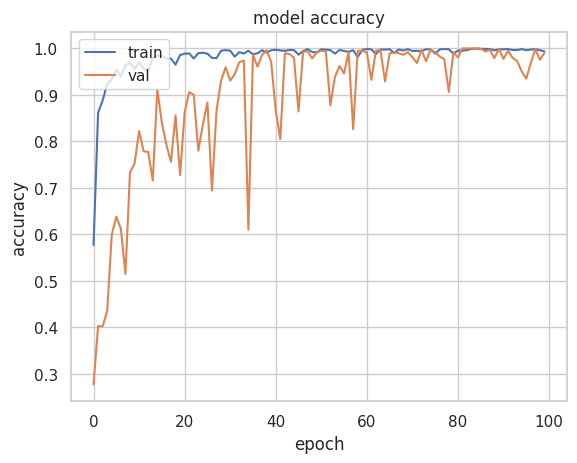

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

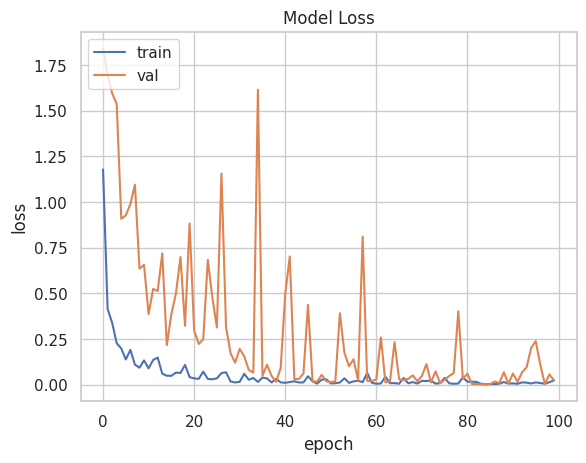

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc ='upper left')
plt.show()

In [37]:
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 1s 9ms/step - loss: 1.5280 - accuracy: 0.7459


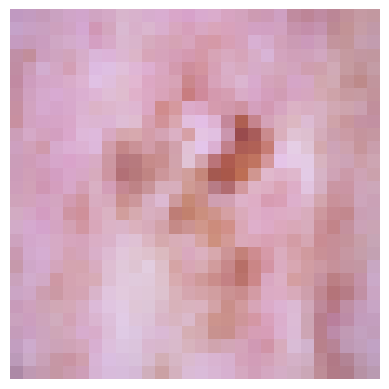

1/1 [==============================] - 1s 549ms/step
[1.1246681e-06 6.8338973e-06 9.9997067e-01 3.2104649e-07 8.3790092e-06
 3.4256635e-07 1.2297144e-05]
('bkl', 'benign keratosis-like lesions')


In [38]:

image = PIL.Image.open('/content/drive/MyDrive/ML_PROJECTS/ISIC_0027419.jpg')
image = image.resize((28, 28))
img = np.array(image)

plt.imshow(img)
plt.axis('off')
plt.show()
img = x_test[1]
img = np.array(image).reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


63/63 [==============================] - 1s 5ms/step
Precision: 0.7189
Recall: 0.7459
F1 Score: 0.7278
